In [36]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read CSV (replace 'your_file.csv' with the actual filename)
df = pd.read_csv(r"housing - housing.csv")

# Show first rows
df.head()

Saving housing - housing.csv to housing - housing (2).csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.871975,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899973,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [41]:
median_value = df['total_bedrooms'].median()

df['total_bedrooms'] = df['total_bedrooms'].fillna(median_value)

print(df['total_bedrooms'].isna().sum())


0


In [42]:
cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
]

for col in cols:
    df[col] = df[col].astype(int)

# Check results
print(df[cols].dtypes)
print(df[cols].head())



housing_median_age    int64
total_rooms           int64
total_bedrooms        int64
population            int64
households            int64
dtype: object
   housing_median_age  total_rooms  total_bedrooms  population  households
0                  41          880             129         322         126
1                  21         7099            1106        2401        1138
2                  52         1467             190         496         177
3                  52         1274             235         558         219
4                  52         1627             280         565         259


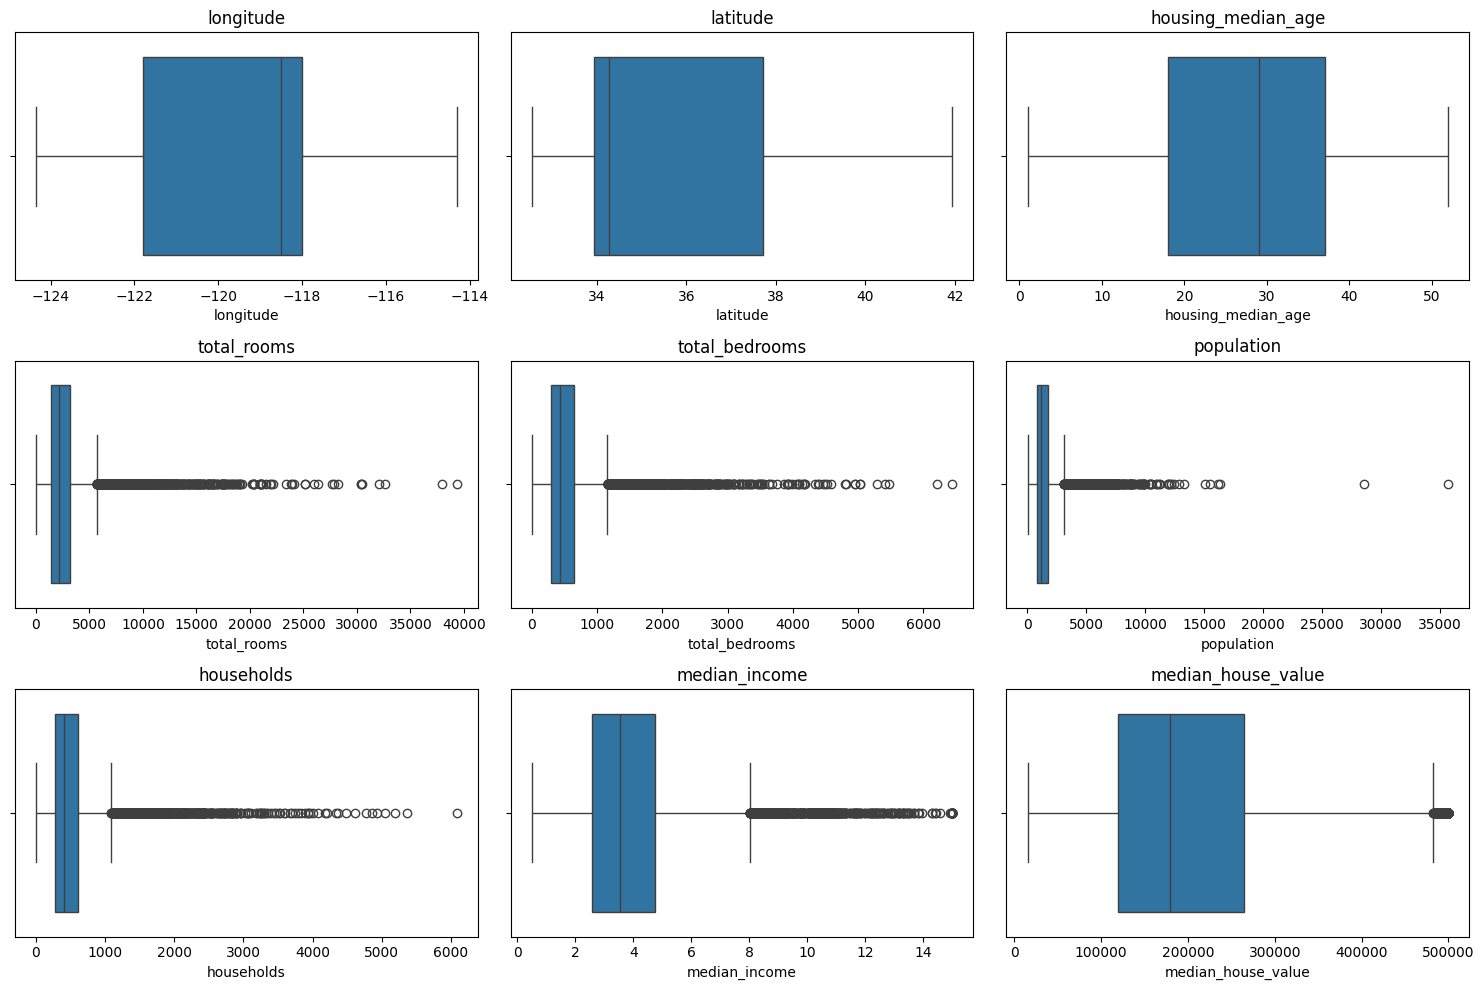

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot all numeric columns in a grid of boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # 3x3 grid (adjust depending on number of columns)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



In [44]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

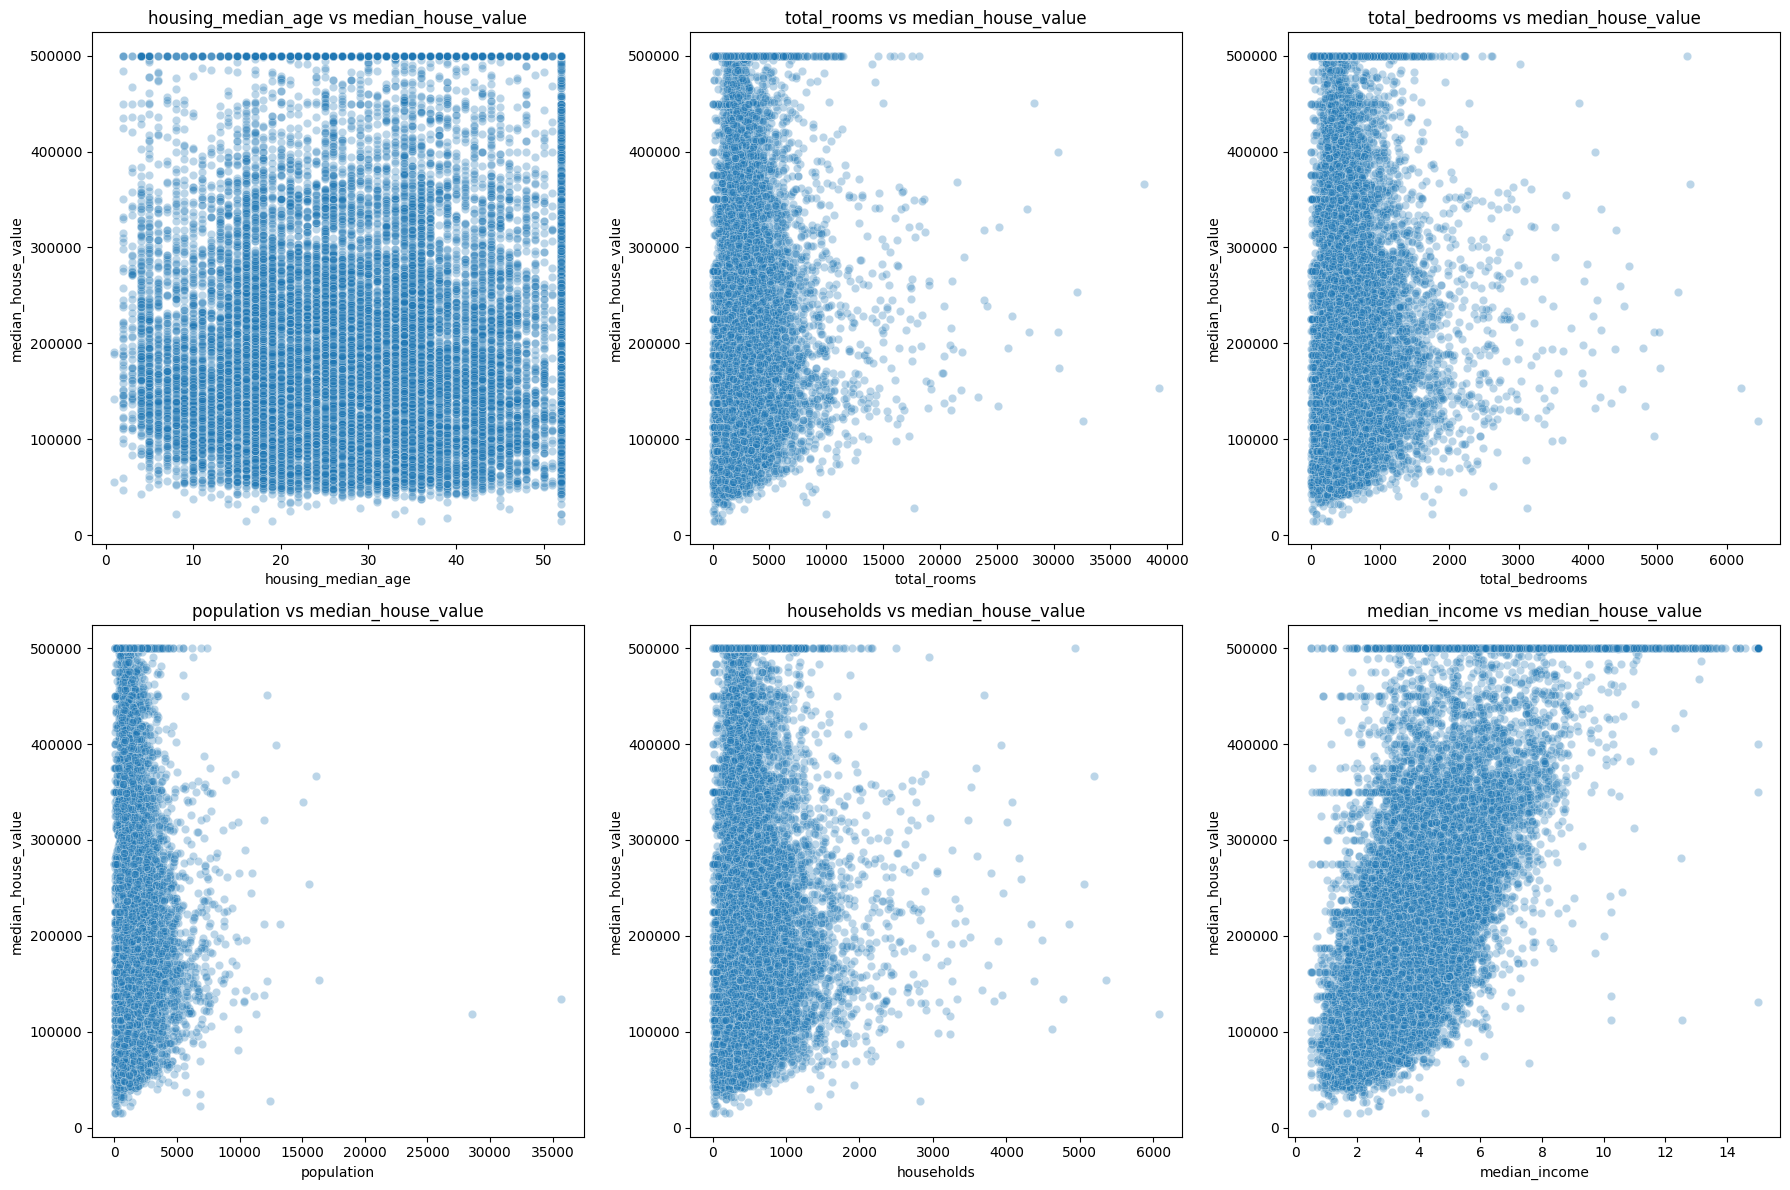

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target column
target = "median_house_value"

# Select some important features
features = ["housing_median_age", "total_rooms", "total_bedrooms",
            "population", "households", "median_income"]

plt.figure(figsize=(18, 12))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)   # grid of 2 rows × 3 cols
    sns.scatterplot(x=df[col], y=df[target], alpha=0.3)
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()


In [46]:
import folium
from folium.plugins import MarkerCluster
import branca.colormap as cm

# Define colormap based on house price
colormap = cm.linear.YlOrRd_09.scale(df['median_house_value'].min(),
                                     df['median_house_value'].max())

# Create map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add cluster
marker_cluster = MarkerCluster().add_to(m)

# Add points
for _, row in df.sample(1000).iterrows():  # use sample for speed
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=colormap(row['median_house_value']),
        fill=True,
        fill_color=colormap(row['median_house_value']),
        fill_opacity=0.6,
        popup=f"Price: ${row['median_house_value']}"
    ).add_to(marker_cluster)

# Add legend
colormap.caption = "Median House Value"
colormap.add_to(m)

m


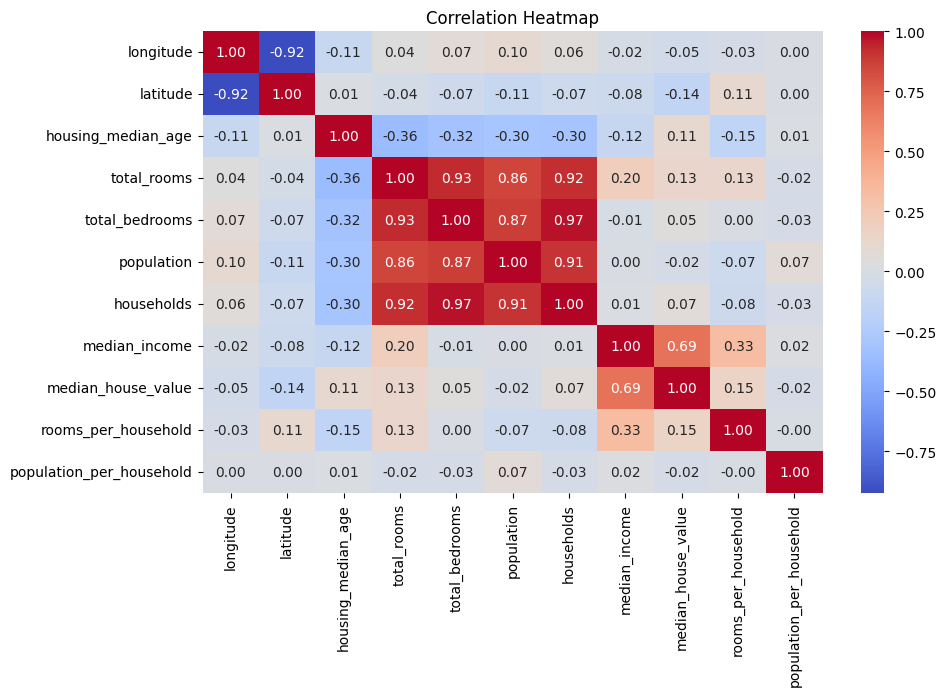

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


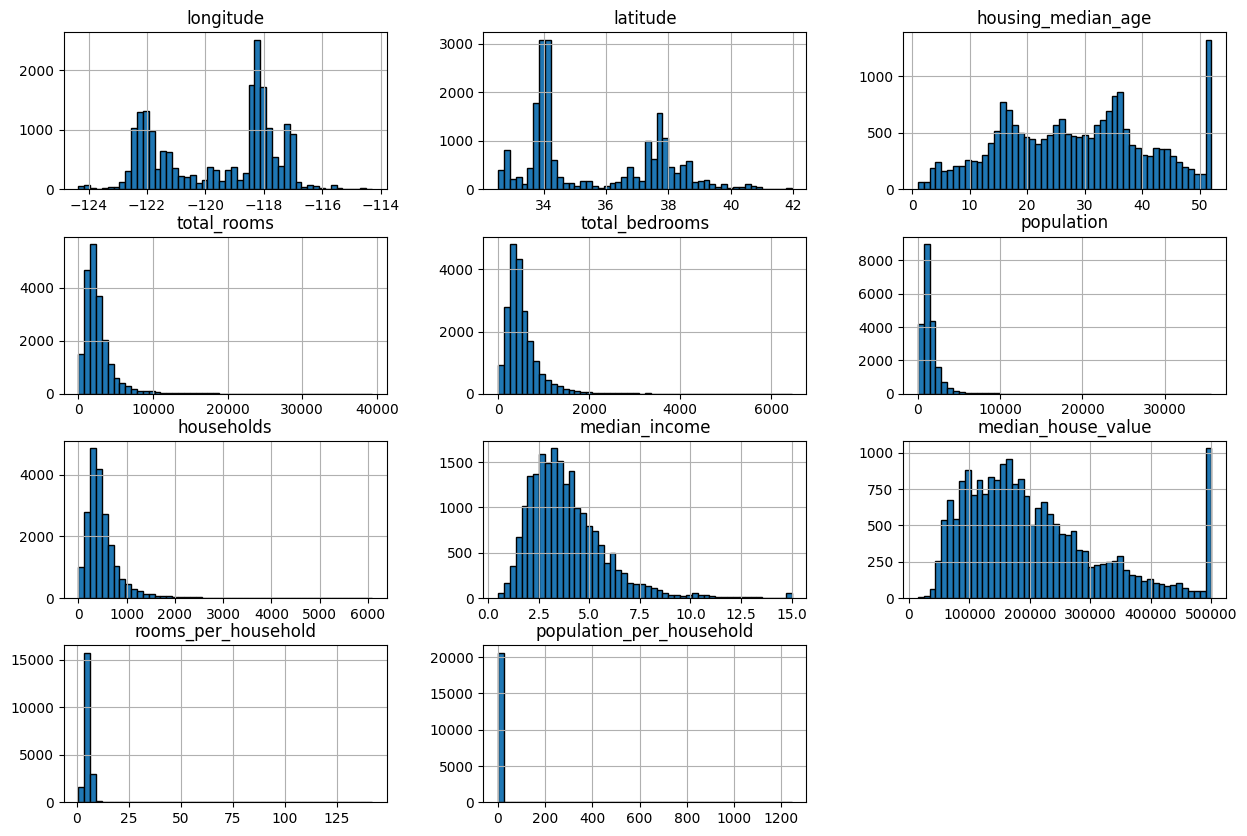

In [48]:
df.hist(figsize=(15,10), bins=50, edgecolor="black")
plt.show()


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

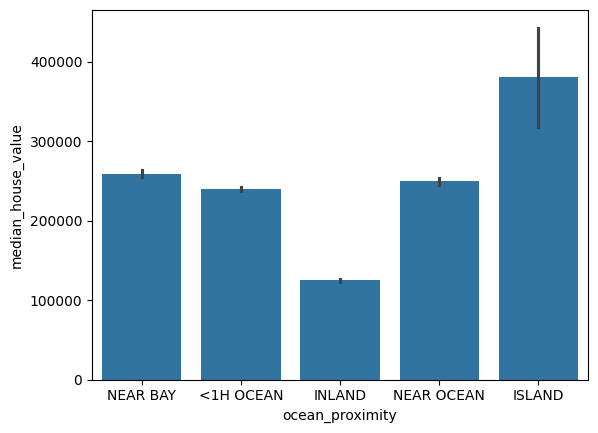

In [49]:
sns.barplot(x="ocean_proximity", y="median_house_value", data=df, estimator=np.mean)

In [50]:
df= pd.get_dummies(df, columns=["ocean_proximity"], drop_first=False).astype(int)
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,6,2,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,6,2,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,8,2,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,5,2,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,6,2,0,0,0,1,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox
# Features
X = df.drop("median_house_value", axis=1)

# Target
y = df["median_house_value"]

# Train-test split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (16512, 15) (16512,)
Test shape: (4128, 15) (4128,)


In [52]:
#Apply Box–Cox on skewed features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
lambdas = {}  # store λ values for each feature

for col in numeric_cols:
    if (X_train[col] > 0).all() and abs(X_train[col].skew()) > 0.5:
        # Fit Box–Cox on training data
        X_train[col], lam = boxcox(X_train[col])
        lambdas[col] = lam
        # Apply same λ to test set
        X_test[col] = boxcox(X_test[col], lmbda=lam)

print("Applied Box–Cox to:", list(lambdas.keys()))

Applied Box–Cox to: ['total_rooms', 'total_bedrooms', 'population', 'households']


In [53]:
# Apply Box–Cox to the target
y_train_trans, lam_target = boxcox(y_train)
y_test_trans = boxcox(y_test, lmbda=lam_target)

print(f"Applied Box–Cox to target with λ = {lam_target:.4f}")

Applied Box–Cox to target with λ = 0.1214


In [56]:
import pandas as pd
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression

# Initialize model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_trans)

LinearRegression()

In [60]:
y_pred_trans = lin_reg.predict(X_test_scaled)
y_pred = inv_boxcox(y_pred_trans, lam_target)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")


Linear Regression Performance:
RMSE: 79,280.54
R²:   0.5203


In [62]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN (k=5 neighbors to start)
knn = KNeighborsRegressor(n_neighbors=5)

# Train on scaled features & Box–Cox target
knn.fit(X_train_scaled, y_train_trans)


KNeighborsRegressor()

In [63]:
# Predict (still in Box–Cox space)
y_pred_trans_knn = knn.predict(X_test_scaled)

# Inverse Box–Cox to get real prices
y_pred_knn = inv_boxcox(y_pred_trans_knn, lam_target)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Performance:")
print(f"RMSE: {rmse_knn:,.2f}")
print(f"R²:   {r2_knn:.4f}")

KNN Regression Performance:
RMSE: 61,596.05
R²:   0.7105


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define model
knn = KNeighborsRegressor()

# Define hyperparameter grid (try k=1 to 30)
param_grid = {'n_neighbors': list(range(1, 21))}

# Cross-validation grid search
grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train_scaled, y_train_trans)

# Best k
best_k = grid.best_params_['n_neighbors']
best_score = -grid.best_score_

print(f"Best k: {best_k}")
print(f"Best CV RMSE: {best_score:.2f}")


Best k: 11
Best CV RMSE: 1.23


In [66]:
# Retrain KNN with the best k
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train_trans)

# Predict on test set
y_pred_trans_knn = best_knn.predict(X_test_scaled)
y_pred_knn = inv_boxcox(y_pred_trans_knn, lam_target)

# Evaluate

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("Final KNN Regression Performance:")
print(f"RMSE: {rmse_knn:,.2f}")
print(f"R²:   {r2_knn:.4f}")


Final KNN Regression Performance:
RMSE: 60,661.22
R²:   0.7192


In [68]:
# Retrain KNN with the best k
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train_trans)

# Predict on test set
y_pred_trans_knn = best_knn.predict(X_test_scaled)
y_pred_knn = inv_boxcox(y_pred_trans_knn, lam_target)

# Evaluate

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("Final KNN Regression Performance:")
print(f"RMSE: {rmse_knn:,.2f}")
print(f"R²:   {r2_knn:.4f}")

Final KNN Regression Performance:
RMSE: 60,661.22
R²:   0.7192


In [69]:
from sklearn.ensemble import RandomForestRegressor

# Baseline model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train_trans)

# Predict
y_pred_trans_rf = rf.predict(X_test_scaled)
y_pred_rf = inv_boxcox(y_pred_trans_rf, lam_target)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Baseline Random Forest Performance:")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"R²:   {r2_rf:.4f}")


Baseline Random Forest Performance:
RMSE: 58,640.05
R²:   0.7376


In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Randomized search with 5-fold CV
rf_random = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1, verbose=1
)

rf_random.fit(X_train_scaled, y_train_trans)

print("Best Parameters:", rf_random.best_params_)
print("Best CV RMSE:", -rf_random.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV RMSE: 1.1663729510420109


In [71]:
best_rf = rf_random.best_estimator_

# Predict on test set
y_pred_trans_rf_best = best_rf.predict(X_test_scaled)
y_pred_rf_best = inv_boxcox(y_pred_trans_rf_best, lam_target)

# Evaluate
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print("Tuned Random Forest Performance:")
print(f"RMSE: {rmse_rf_best:,.2f}")
print(f"R²:   {r2_rf_best:.4f}")


Tuned Random Forest Performance:
RMSE: 58,004.59
R²:   0.7432
